First, run extract_partial_point_clouds_from_kitty.py through every training car index.
Also collect a singular index for a pedestrian.
Only do this if the output folder is empty.

In [1]:
%run extract_partial_car.py
%run extract_partial_pedestrian.py

0 cars are labeled in the point clouds
1 cars are labeled in the point clouds
1 cars are labeled in the point clouds
1 cars are labeled in the point clouds
2 cars are labeled in the point clouds
0 cars are labeled in the point clouds
4 cars are labeled in the point clouds
3 cars are labeled in the point clouds
6 cars are labeled in the point clouds
3 cars are labeled in the point clouds
8 cars are labeled in the point clouds
2 cars are labeled in the point clouds
1 cars are labeled in the point clouds
1 cars are labeled in the point clouds
1 cars are labeled in the point clouds
1 cars are labeled in the point clouds
4 cars are labeled in the point clouds
1 cars are labeled in the point clouds
1 cars are labeled in the point clouds
2 cars are labeled in the point clouds
1 cars are labeled in the point clouds
6 cars are labeled in the point clouds
2 cars are labeled in the point clouds
1 cars are labeled in the point clouds
3 cars are labeled in the point clouds
5 cars are labeled in the

Then, run the below script for each index to consolidate the points into a single list.

If needed run visualize.py through the cmd to ensure the points are accurate.

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

cars = np.load("output/000001/car/point_0.npy").reshape(-1, 3)

for j in range (2, 7479):
    if (j < 10):
        idx = '00000' + str(j)
    elif (j >= 10 and j < 100 ):
        idx = '0000' + str(j)
    elif (j >= 100 and j < 1000 ):
        idx = '000' + str(j)
    elif (j >= 1000 and j < 10000 ):
        idx = '00' + str(j)

    if(os.path.isdir("output/"+idx+"/car")):
        for file in os.listdir("output/"+idx+"/car"):
            if file.startswith("point"):
                cars = np.append(cars, np.load("output/"+idx+"/car/"+file).reshape(-1, 3), axis=0)

np.save("output/outall.npy", np.asarray(cars))

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

cars = np.load("output/outall.npy")

Finally, train COPOD using those totals and test it against a solo point cloud of a pedestrian.

In [3]:
from pyod.models.copod import COPOD

clf_name = 'COPOD'
clf = COPOD(contamination=0.01, n_jobs=3)
clf.fit(cars)

c:\Users\nreis\AppData\Local\Programs\Python\Python310\lib\site-packages\pyod\models\copod.py:182: UserWarning: n_features <= n_jobs; setting them equal instead.
  warnings.warn("n_features <= n_jobs; setting them equal instead.")
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:   47.5s finished


COPOD(contamination=0.01, n_jobs=3)

In [ ]:
i = 0

In [4]:
ped_predict = list()
ped_score = list()

if(i<=7479):
    for j in range (i, i+100):
        print("Scene:" + str(j))
        if (j < 10):
            idx = '00000' + str(j)
        elif (j >= 10 and j < 100 ):
            idx = '0000' + str(j)
        elif (j >= 100 and j < 1000 ):
            idx = '000' + str(j)
        elif (j >= 1000 and j < 10000 ):
            idx = '00' + str(j)

        if(os.path.isdir("output/"+idx+"/pedestrian")):
            for file in os.listdir("output/"+idx+"/pedestrian"):
                if file.startswith("point"):
                    pts = np.load("output/"+idx+"/pedestrian/"+file).reshape(-1, 3)

                    predict = clf.predict(pts)
                    outliers = predict[np.where(predict==1)]
                    ped_predict.append((outliers.size/predict.size)*100)

                    score = clf.decision_function(pts)
                    ped_score.append((sum(score)/score.size)*10)
    
    if(i>100):
        ped_predict = np.append(np.load("output/ped_predict.npy"), np.asarray(ped_predict))
        ped_score = np.append(np.load("output/ped_score.npy"), np.asarray(ped_score))

    i+=100
    
    np.save("output/ped_predict.npy", ped_predict)
    np.save("output/ped_score.npy", ped_score)

    print("Batch #" + str(i/100) + " of 75 completed.")
    print(str(i))

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:   39.0s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:   39.5s finished
c:\Users\nreis\AppData\Local\Programs\Python\Python310\lib\site-packages\pyod\models\copod.py:182: UserWarning: n_features <= n_jobs; setting them equal instead.
  warnings.warn("n_features <= n_jobs; setting them equal instead.")
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:   38.2s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:   36.4s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:   36.7s finished
c:\Users\nreis\AppData\Local\Programs\Python

Batch #5.0 of 75 completed.
500


In [1]:
from pyod.models.copod import COPOD


clf_name = 'COPOD'
clf = COPOD(contamination=0.01, n_jobs=3)
clf.fit(cars)

NameError: name 'cars' is not defined

In [5]:
i = 0

In [6]:
car_predict = list()
car_score = list()

if(i<=7479):
    for j in range (i, i+100):
        print("Scene:" + str(j))
        if (j < 10):
            idx = '00000' + str(j)
        elif (j >= 10 and j < 100 ):
            idx = '0000' + str(j)
        elif (j >= 100 and j < 1000 ):
            idx = '000' + str(j)
        elif (j >= 1000 and j < 10000 ):
            idx = '00' + str(j)

        if(os.path.isdir("output/"+idx+"/car")):
            for file in os.listdir("output/"+idx+"/car"):
                if file.startswith("point"):
                    pts = np.load("output/"+idx+"/car/"+file).reshape(-1, 3)

                    predict = clf.predict(pts)
                    outliers = predict[np.where(predict==1)]
                    car_predict.append((outliers.size/predict.size)*100)

                    score = clf.decision_function(pts)
                    car_score.append((sum(score)/score.size)*10)
    
    if(i>100):
        car_predict = np.append(np.load("output/car_predict.npy"), np.asarray(car_predict))
        car_score = np.append(np.load("output/car_score.npy"), np.asarray(car_score))

    i+=100
    
    np.save("output/car_predict.npy", car_predict)
    np.save("output/car_score.npy", car_score)

    print("Batch #" + str(i/100) + " of 75 completed.")
    print(str(i))

[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:   36.2s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:   36.5s finished
c:\Users\nreis\AppData\Local\Programs\Python\Python310\lib\site-packages\pyod\models\copod.py:182: UserWarning: n_features <= n_jobs; setting them equal instead.
  warnings.warn("n_features <= n_jobs; setting them equal instead.")
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:   36.2s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:   36.5s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done   3 out of   3 | elapsed:   36.1s finished
c:\Users\nreis\AppData\Local\Programs\Python

Batch #5.0 of 75 completed.
500


In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import axes3d

ped_predict = np.load("output/ped_predict.npy")
ped_score = np.load("output/ped_score.npy")

car_predict = np.load("output/car_predict.npy")
car_score = np.load("output/car_score.npy")

### Outlier Percentage Results (Predict)

Pedestrian

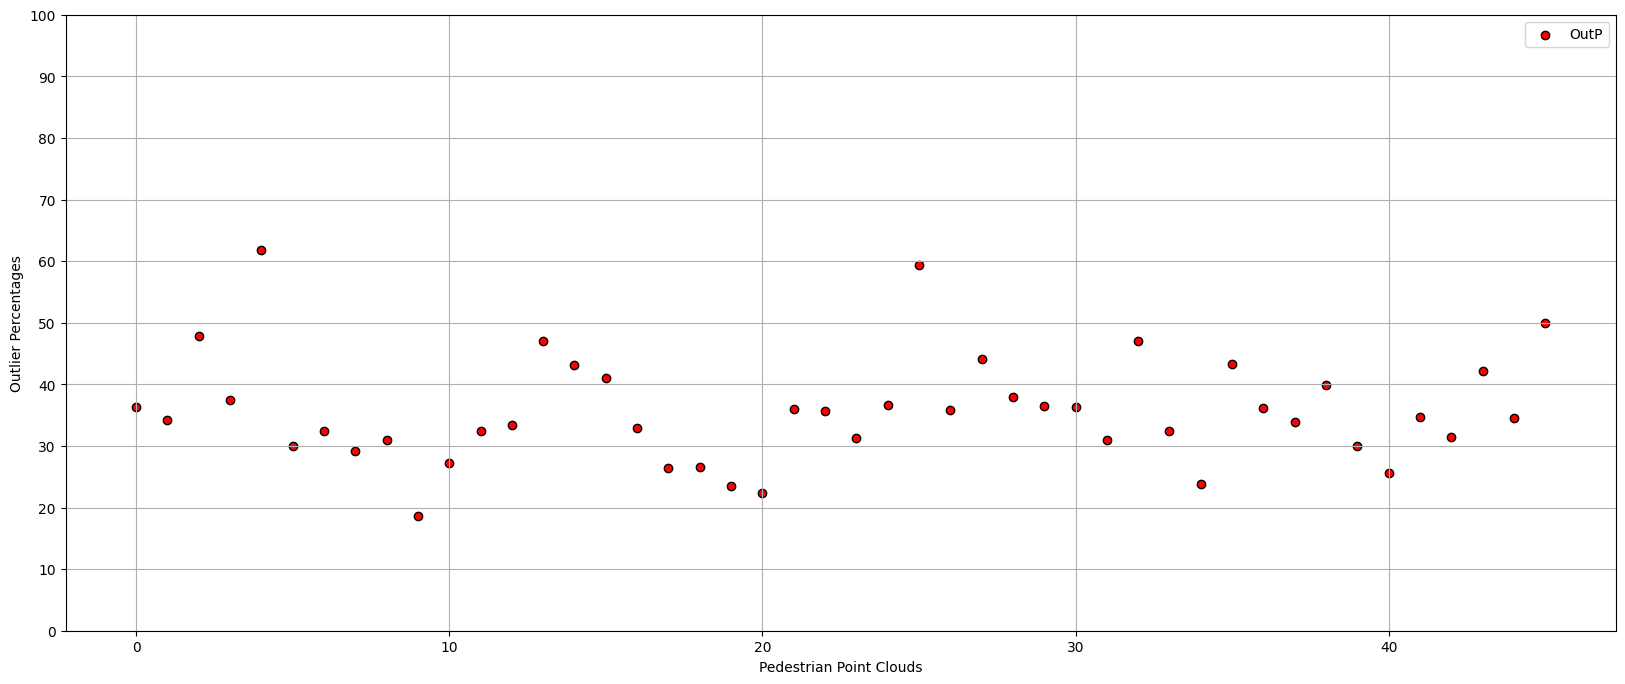

In [4]:
X = np.arange(0, len(ped_predict))

plt.rcParams['figure.figsize'] = [20, 8]

plt.scatter(X, ped_predict, edgecolor='black',color='red', label='OutP')
plt.yticks(np.arange(0, 110, step=10))
plt.legend()
plt.grid()
plt.ylabel('Outlier Percentages')
plt.xlabel('Pedestrian Point Clouds')
plt.show()

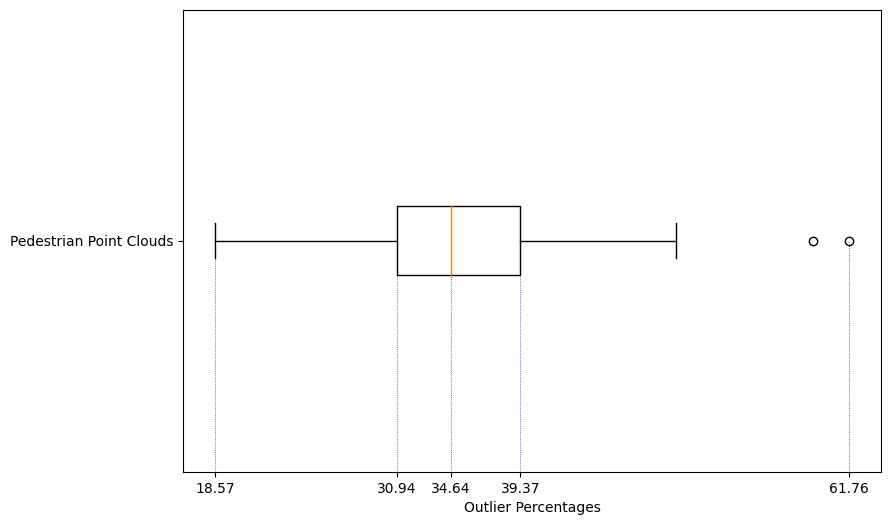

Sample Size:46
Quartiles:[18.57142857 30.94043887 34.63753388 39.36931124 61.76470588]
Min. Outlier Percentage:(array([9], dtype=int64),)
Max. Outlier Percentage:(array([4], dtype=int64),)
Standard Deviation:8.686563536369908
Variance:75.4563860713913


In [5]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

ax.boxplot(ped_predict, vert=False, manage_ticks=True)
ax.set_xlabel('Outlier Percentages')
ax.set_yticks([1])
ax.set_yticklabels(['Pedestrian Point Clouds'])

quantiles = np.percentile(ped_predict, [0, 25, 50, 75, 100])
ax.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
          color='b', ls=':', lw=0.5, zorder=0)
ax.set_ylim(0.5, 1.5)
ax.set_xticks(quantiles)
plt.show()

print("Sample Size:" + str(len(ped_predict)))
print("Quartiles:" + str(np.percentile(ped_predict, [0, 25, 50, 75, 100])))
print("Min. Outlier Percentage:" + str(np.where(ped_predict==np.min(ped_predict))))
print("Max. Outlier Percentage:" + str(np.where(ped_predict==np.max(ped_predict))))
print("Standard Deviation:" + str(np.std(ped_predict)))
print("Variance:" + str(np.var(ped_predict)))

In [25]:
quantiles

array([18.57142857, 30.94043887, 34.63753388, 39.36931124, 61.76470588])

Car

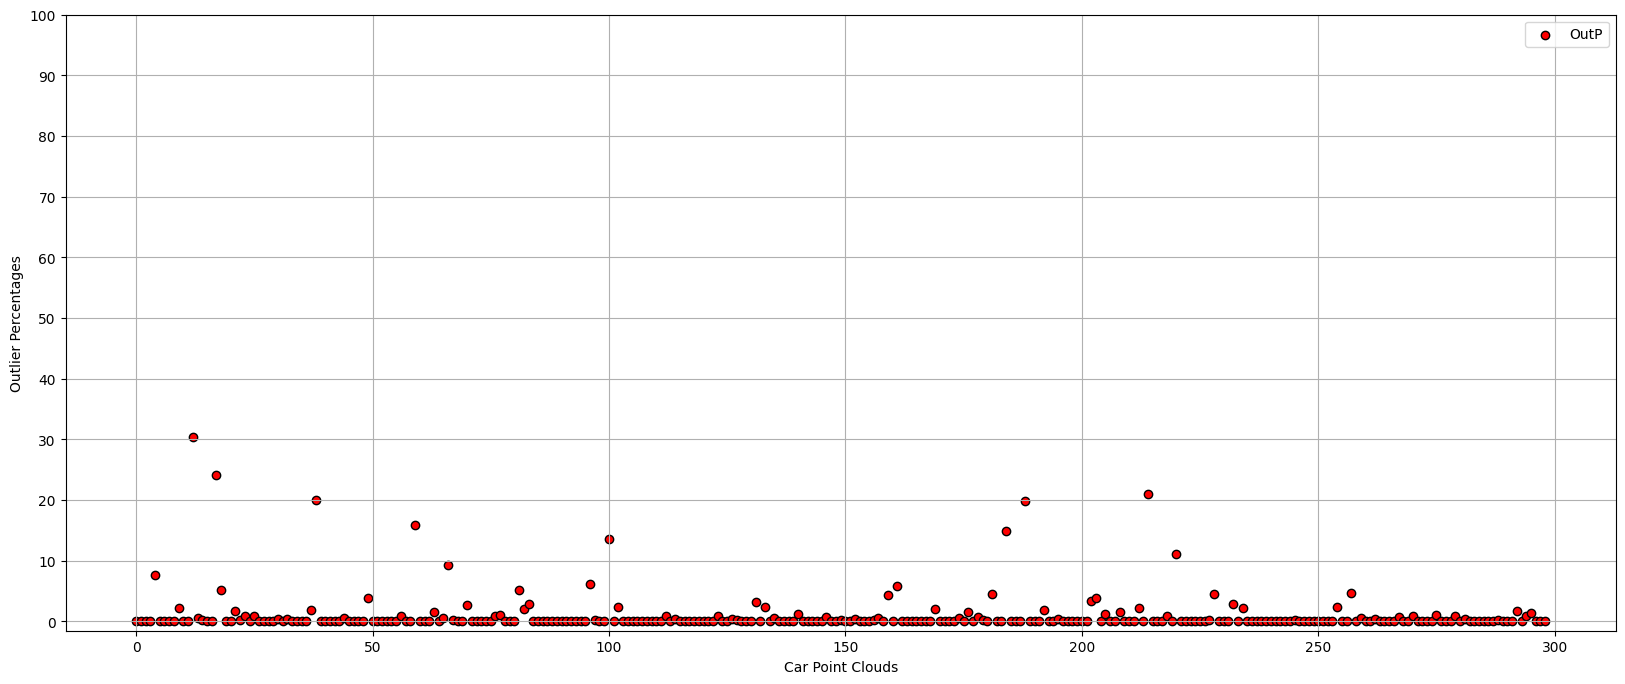

In [6]:
X = np.arange(0, len(car_predict))

plt.rcParams['figure.figsize'] = [20, 8]

plt.scatter(X, car_predict, edgecolor='black',color='red', label='OutP')
plt.yticks(np.arange(0, 110, step=10))
plt.legend()
plt.grid()
plt.ylabel('Outlier Percentages')
plt.xlabel('Car Point Clouds')
plt.show()

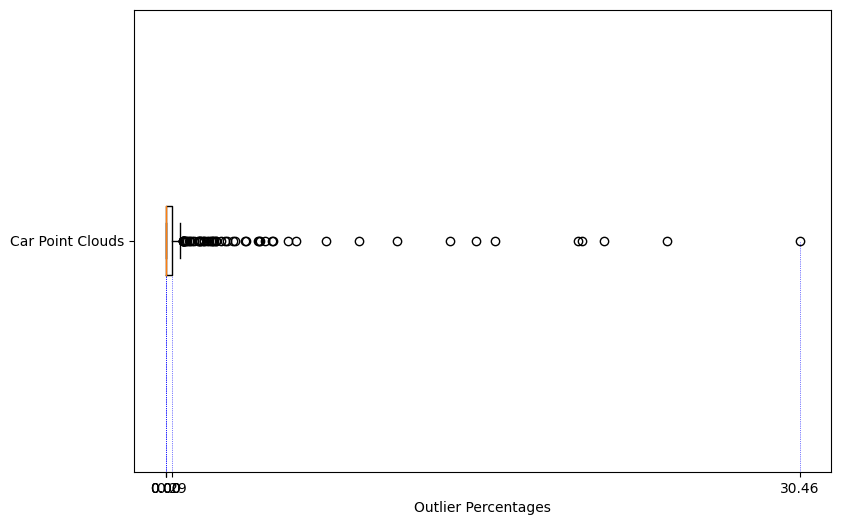

Sample Size:299
Quartiles:[ 0.          0.          0.          0.2929015  30.45567523]
Min. Outlier Percentage:(array([  0,   1,   2,   3,   5,   6,   7,   8,  10,  11,  16,  19,  20,
        24,  26,  27,  28,  29,  31,  33,  34,  35,  36,  39,  40,  41,
        42,  43,  45,  46,  47,  48,  50,  51,  52,  53,  54,  55,  57,
        58,  60,  61,  62,  64,  68,  69,  71,  72,  73,  74,  75,  78,
        79,  80,  84,  85,  86,  87,  89,  90,  91,  93,  94,  95,  98,
        99, 101, 103, 104, 105, 106, 107, 108, 109, 110, 115, 116, 117,
       118, 119, 120, 122, 124, 125, 128, 129, 130, 132, 134, 136, 137,
       138, 139, 141, 142, 143, 144, 145, 147, 148, 150, 151, 153, 154,
       155, 158, 160, 162, 163, 164, 165, 166, 167, 170, 171, 172, 173,
       175, 177, 180, 182, 183, 185, 187, 189, 190, 191, 193, 194, 196,
       197, 198, 199, 200, 201, 204, 206, 207, 209, 210, 211, 213, 215,
       216, 217, 219, 221, 222, 223, 224, 225, 226, 229, 230, 231, 233,
       235, 236, 237, 2

In [6]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

ax.boxplot(car_predict, vert=False, manage_ticks=True)
ax.set_xlabel('Outlier Percentages')
ax.set_yticks([1])
ax.set_yticklabels(['Car Point Clouds'])

quantiles = np.percentile(car_predict, [0, 25, 50, 75, 100])
ax.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
          color='b', ls=':', lw=0.5, zorder=0)
ax.set_ylim(0.5, 1.5)
ax.set_xticks(quantiles)
plt.show()

print("Sample Size:" + str(len(car_predict)))
print("Quartiles:" + str(np.percentile(car_predict, [0, 25, 50, 75, 100])))
print("Min. Outlier Percentage:" + str(np.where(car_predict==np.min(car_predict))))
print("Max. Outlier Percentage:" + str(np.where(car_predict==np.max(car_predict))))
print("Standard Deviation:" + str(np.std(car_predict)))
print("Variance:" + str(np.var(car_predict)))

### Average Anomaly Score Results (Score)

Pedestrian

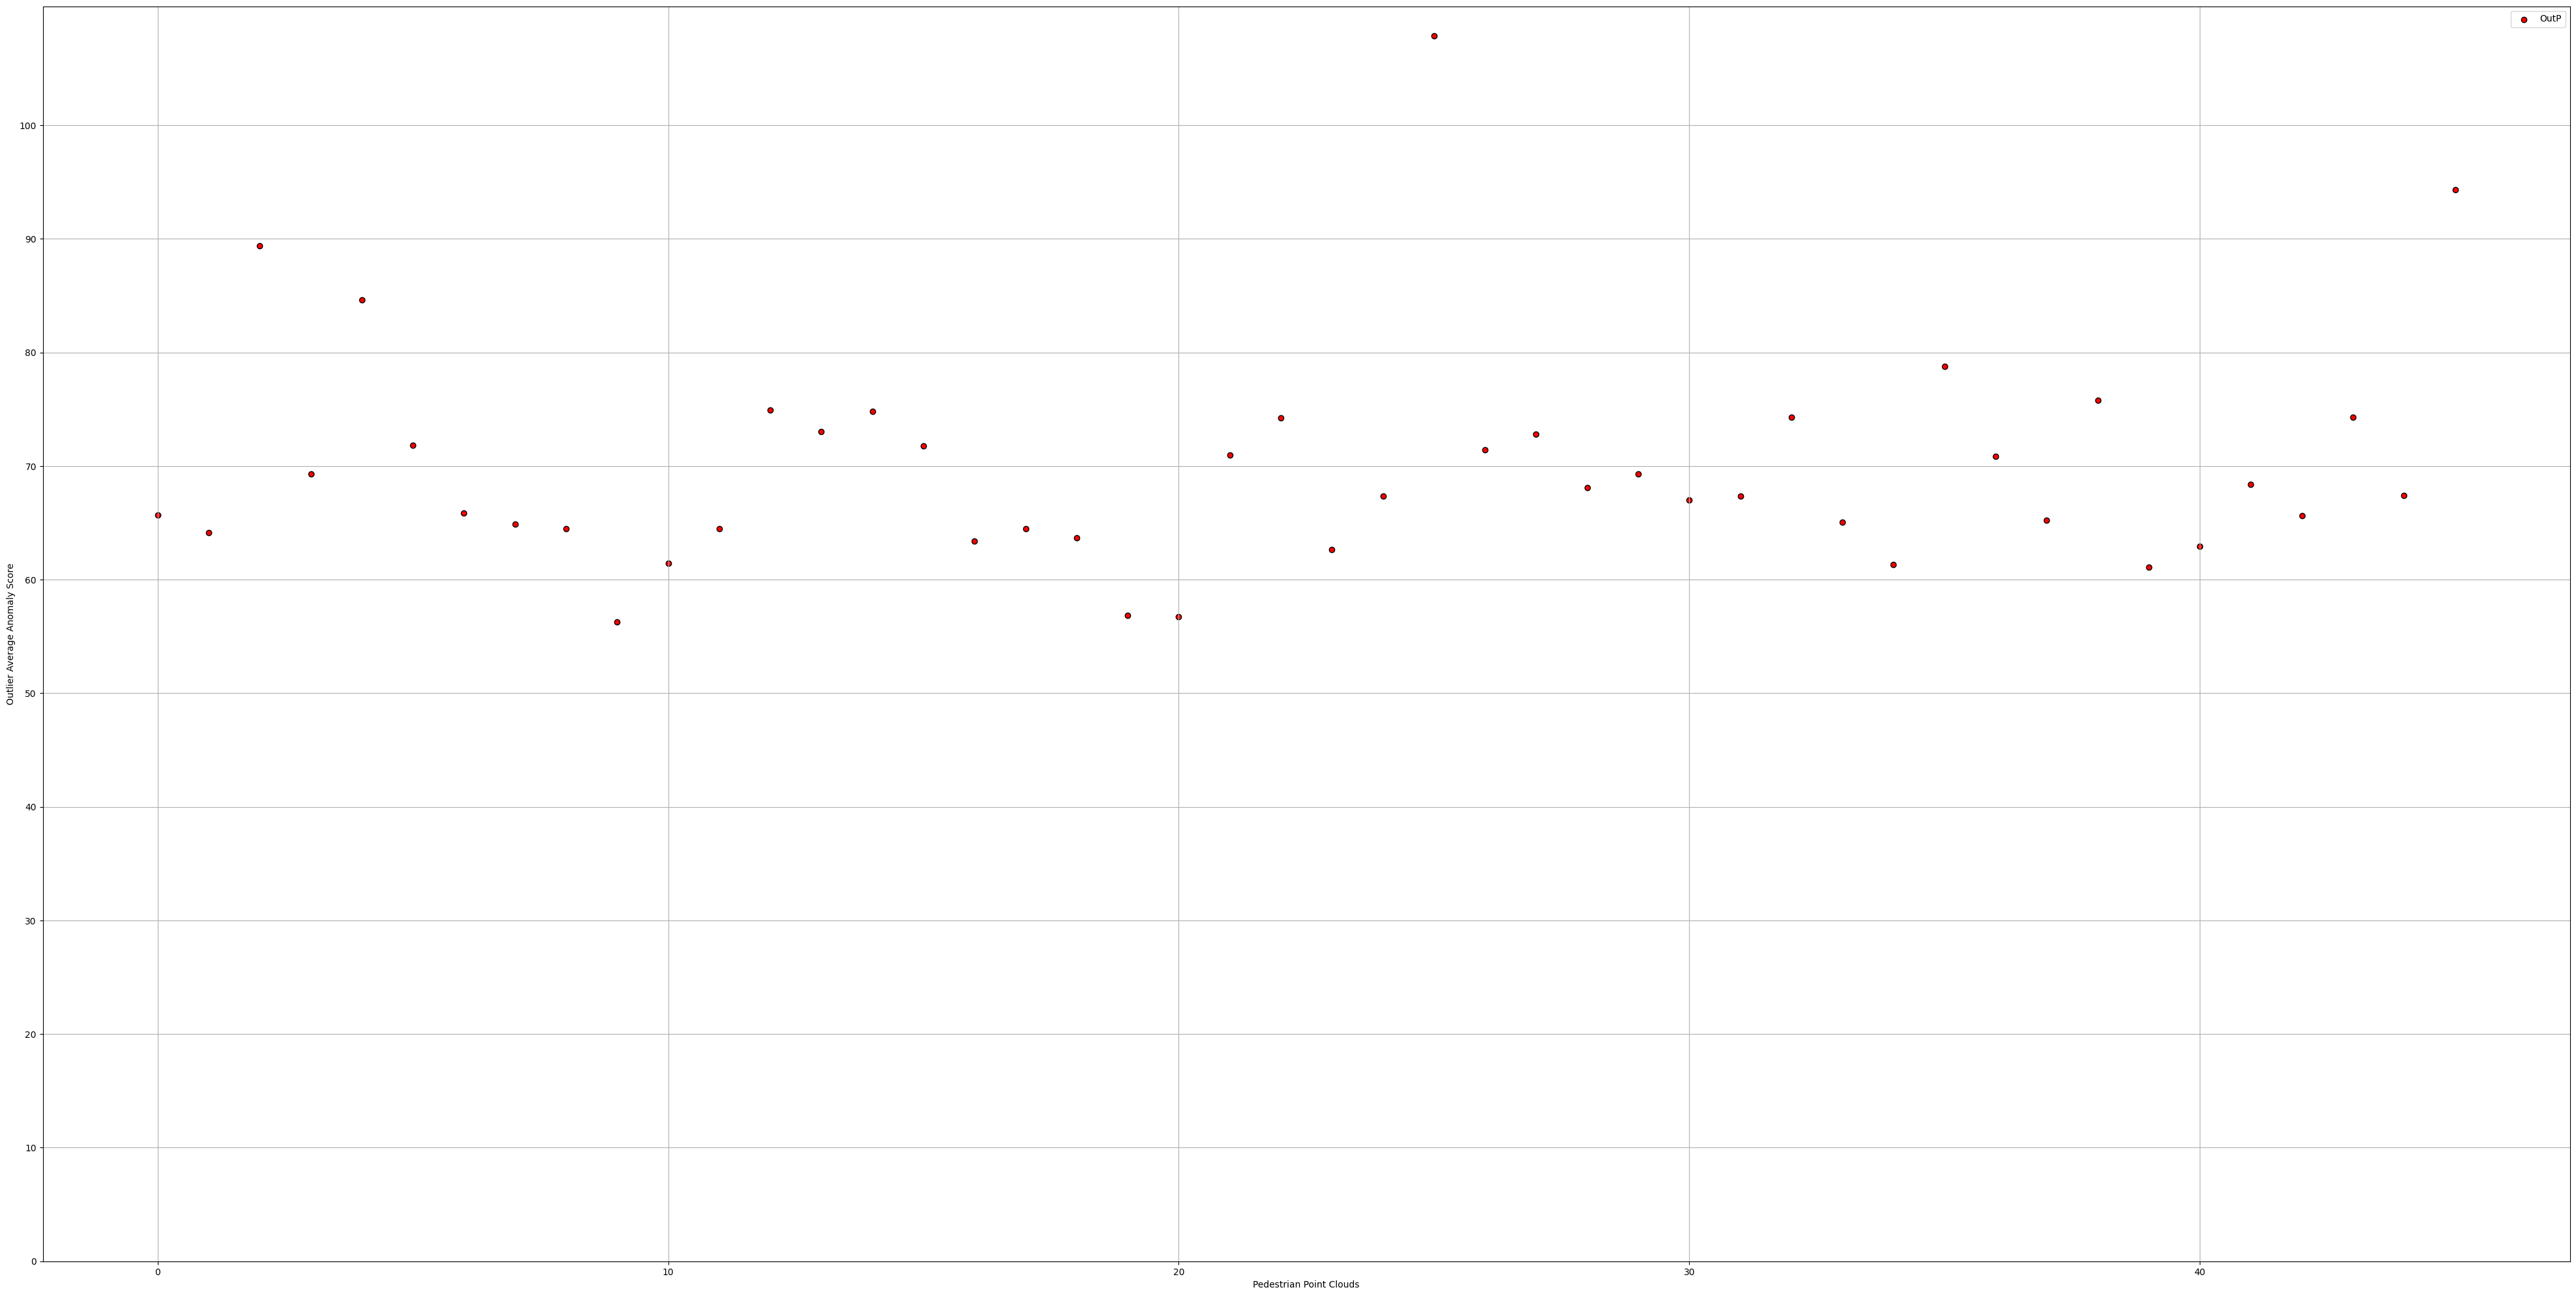

In [16]:
X = np.arange(0, len(ped_score))

plt.rcParams['figure.figsize'] = [50, 25]

plt.scatter(X, ped_score, edgecolor='black',color='red', label='OutP')
plt.yticks(np.arange(0, 110, step=10))
plt.legend()
plt.grid()
plt.ylabel('Outlier Average Anomaly Score')
plt.xlabel('Pedestrian Point Clouds')
plt.show()

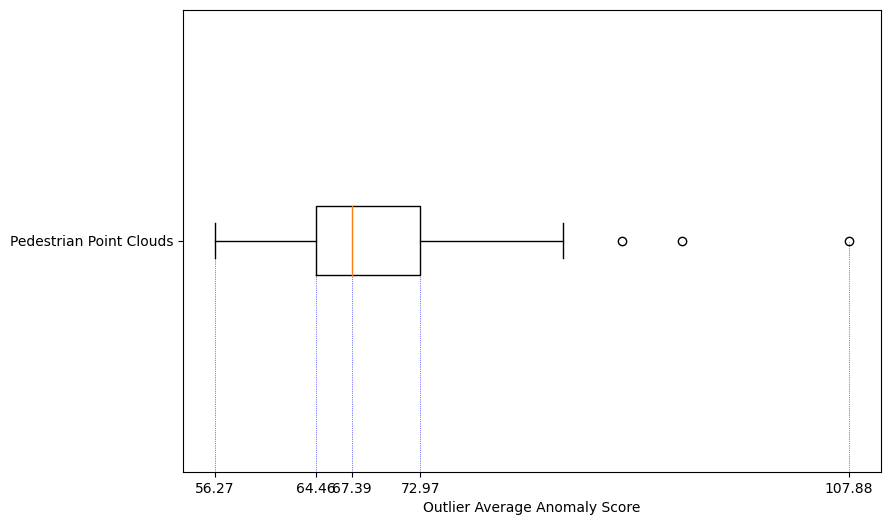

Sample Size:46
Quartiles:[ 56.27070305  64.46417102  67.38935167  72.97182377 107.8776104 ]
Min. Outlier Average Anomaly Score:(array([9], dtype=int64),)
Max. Outlier Average Anomaly Score:(array([25], dtype=int64),)
Standard Deviation:9.432491604865305
Variance:88.97189787585445


In [17]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

ax.boxplot(ped_score, vert=False, manage_ticks=True)
ax.set_xlabel('Outlier Average Anomaly Score')
ax.set_yticks([1])
ax.set_yticklabels(['Pedestrian Point Clouds'])

quantiles = np.percentile(ped_score, [0, 25, 50, 75, 100])
ax.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
          color='b', ls=':', lw=0.5, zorder=0)
ax.set_ylim(0.5, 1.5)
ax.set_xticks(quantiles)
plt.show()

print("Sample Size:" + str(len(ped_score)))
print("Quartiles:" + str(np.percentile(ped_score, [0, 25, 50, 75, 100])))
print("Min. Outlier Average Anomaly Score:" + str(np.where(ped_score==np.min(ped_score))))
print("Max. Outlier Average Anomaly Score:" + str(np.where(ped_score==np.max(ped_score))))
print("Standard Deviation:" + str(np.std(ped_score)))
print("Variance:" + str(np.var(ped_score)))

Car

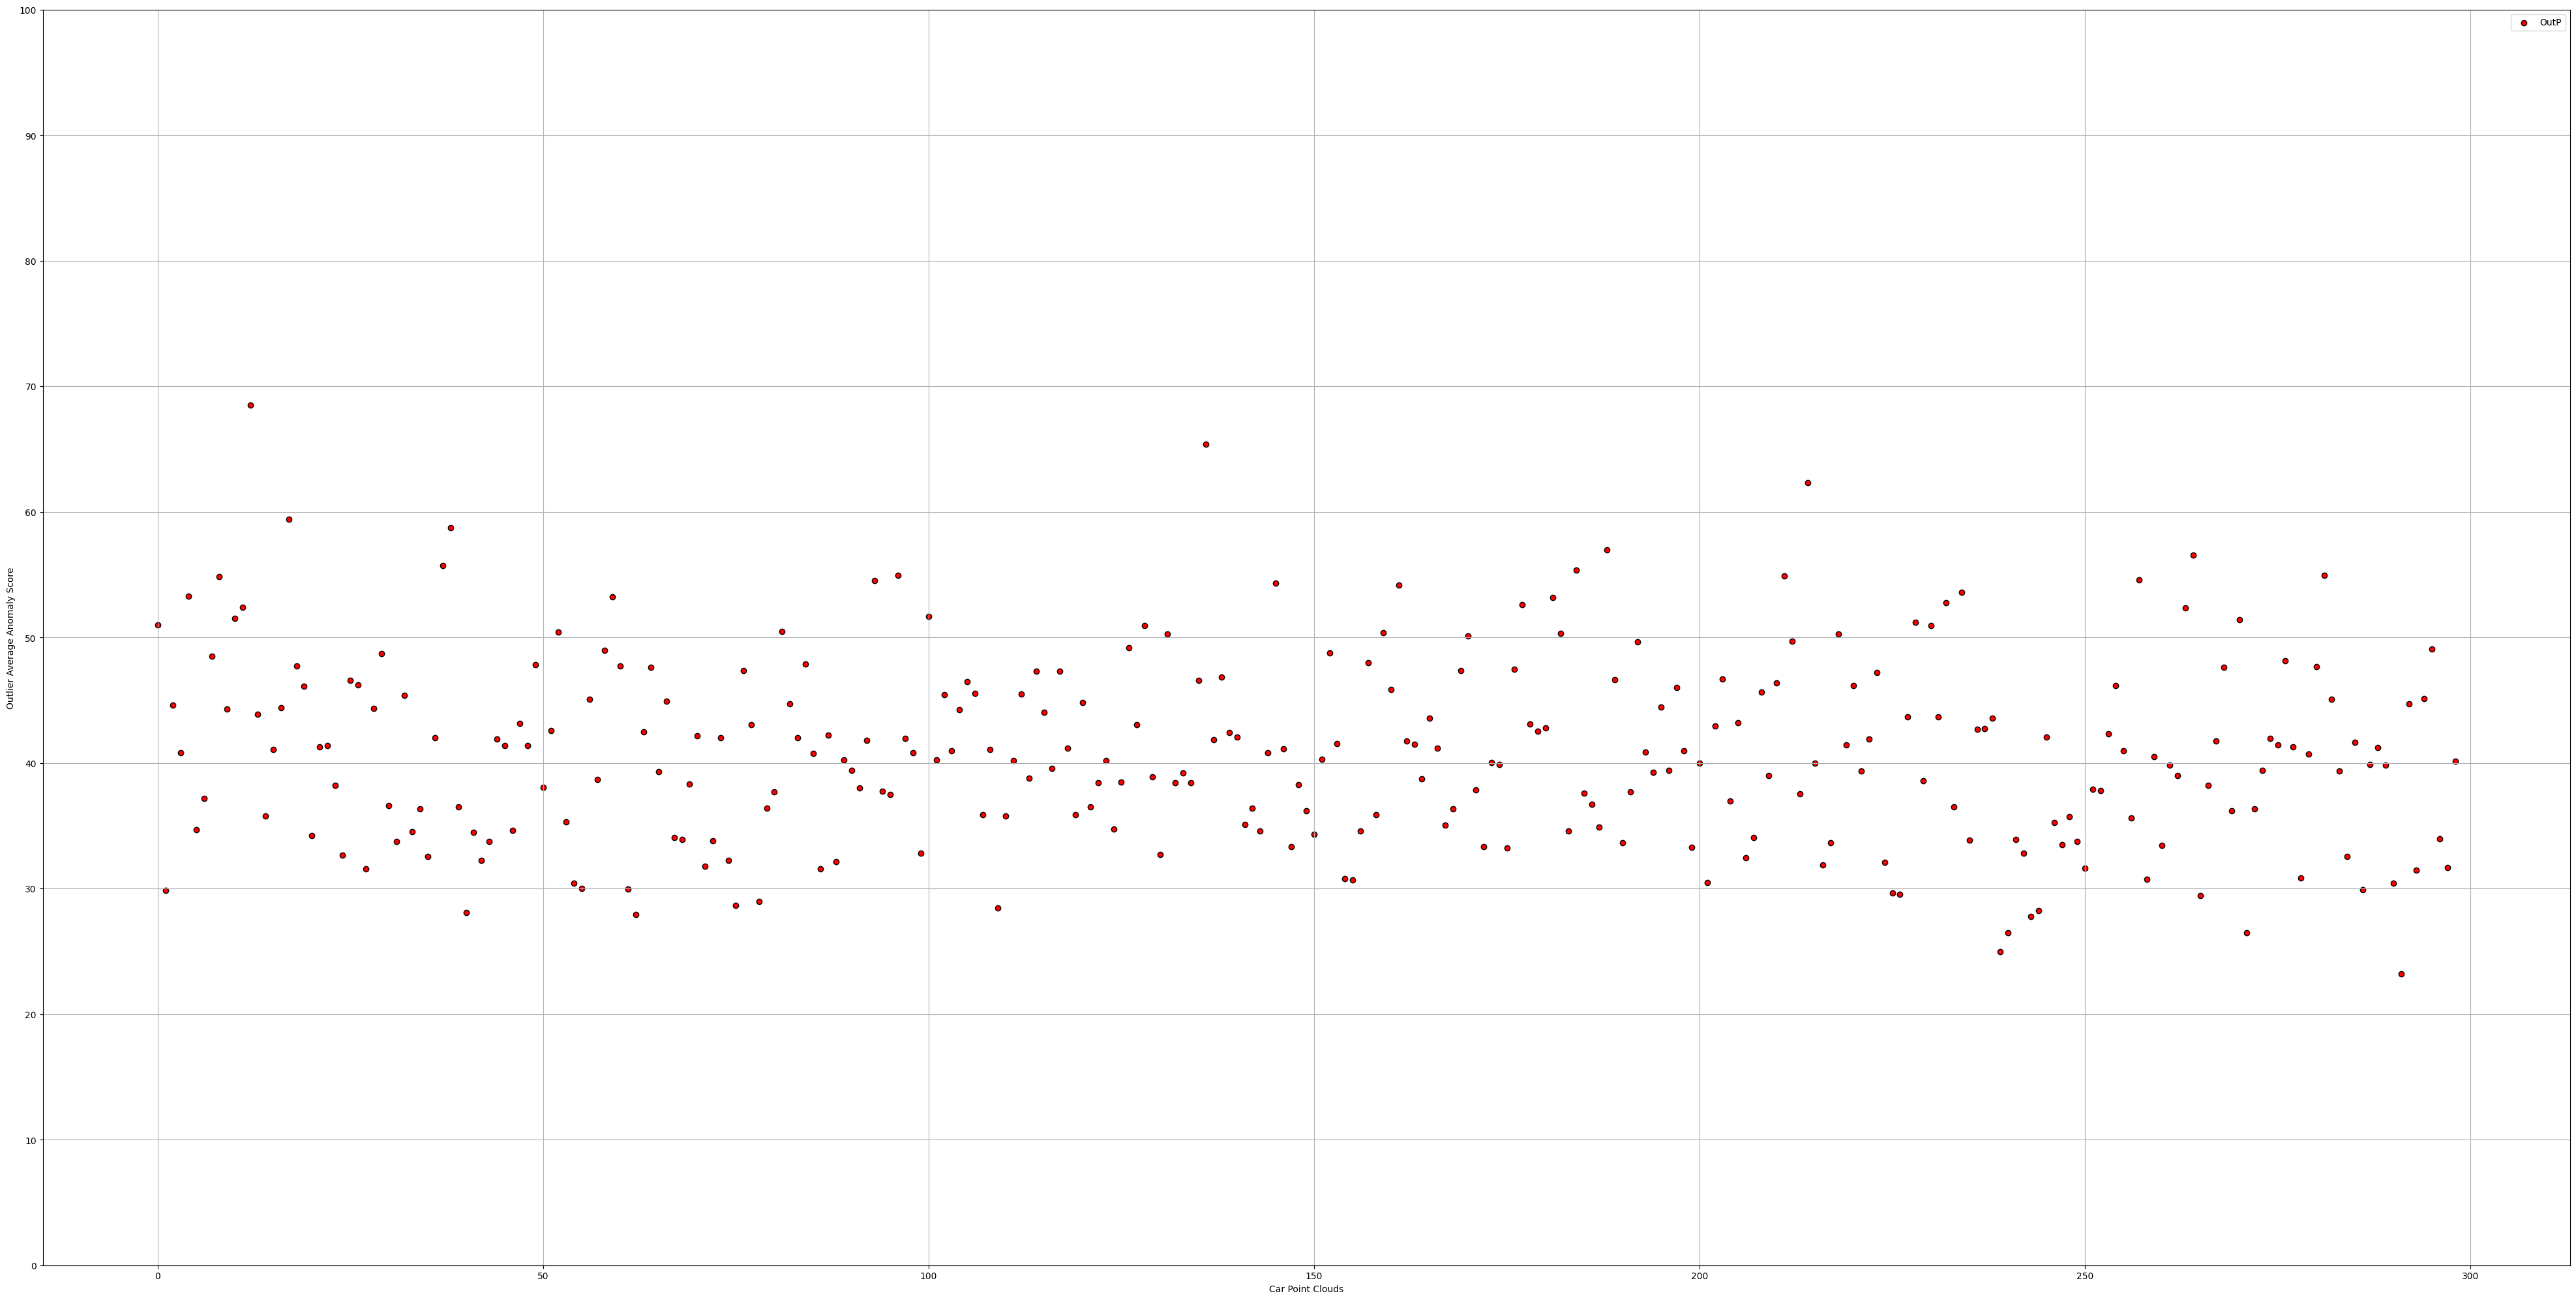

In [18]:
X = np.arange(0, len(car_score))

plt.rcParams['figure.figsize'] = [50, 25]

plt.scatter(X, car_score, edgecolor='black',color='red', label='OutP')
plt.yticks(np.arange(0, 110, step=10))
plt.legend()
plt.grid()
plt.ylabel('Outlier Average Anomaly Score')
plt.xlabel('Car Point Clouds')
plt.show()

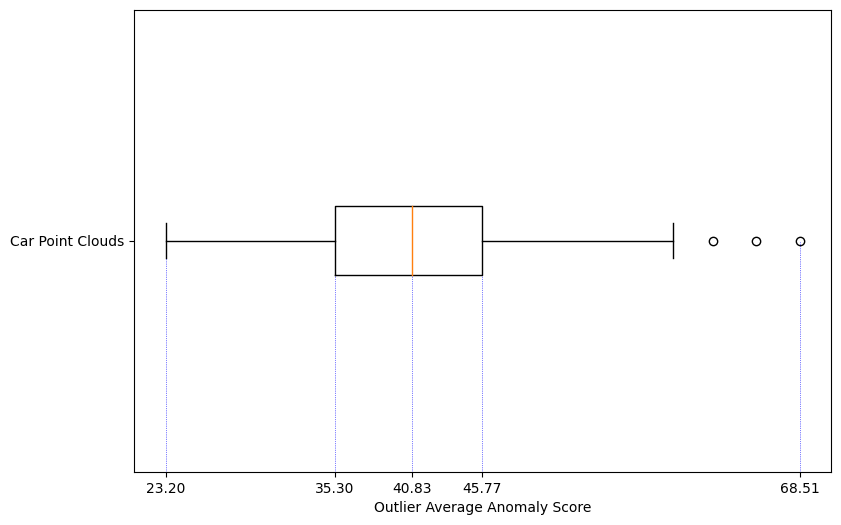

Sample Size:299
Quartiles:[23.20319119 35.2999961  40.83239891 45.77239244 68.51233815]
Min. Outlier Average Anomaly Score:(array([291], dtype=int64),)
Max. Outlier Average Anomaly Score:(array([12], dtype=int64),)
Standard Deviation:7.482290712456514
Variance:55.984674305713014


In [19]:
fig = plt.figure(1, figsize=(9, 6))
ax = fig.add_subplot(111)

ax.boxplot(car_score, vert=False, manage_ticks=True)
ax.set_xlabel('Outlier Average Anomaly Score')
ax.set_yticks([1])
ax.set_yticklabels(['Car Point Clouds'])

quantiles = np.percentile(car_score, [0, 25, 50, 75, 100])
ax.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
          color='b', ls=':', lw=0.5, zorder=0)
ax.set_ylim(0.5, 1.5)
ax.set_xticks(quantiles)
plt.show()

print("Sample Size:" + str(len(car_score)))
print("Quartiles:" + str(np.percentile(car_score, [0, 25, 50, 75, 100])))
print("Min. Outlier Average Anomaly Score:" + str(np.where(car_score==np.min(car_score))))
print("Max. Outlier Average Anomaly Score:" + str(np.where(car_score==np.max(car_score))))
print("Standard Deviation:" + str(np.std(car_score)))
print("Variance:" + str(np.var(car_score)))